# Portfolio Project: Life Expectancy and GDP

Data reads as follows: Country, Year, Life Expectancy, GDP.
6 countries, from 2000 to 2015.

# Initial Loading of Data

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

# Read Data
data = pd.read_csv('all_data.csv')
print(data.head())
print(data.describe())
print(f'rows and columns: {data.shape}')

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
              Year  Life expectancy at birth (years)           GDP
count    96.000000                         96.000000  9.600000e+01
mean   2007.500000                         72.789583  3.880499e+12
std       4.633971                         10.672882  5.197561e+12
min    2000.000000                         44.300000  4.415703e+09
25%    2003.750000                         74.475000  1.733018e+11
50%    2007.500000                         76.750000  1.280220e+12
75%    2011.250000                         78.900000  4.067510e+12
max    2015.000000                         81.000000  1.810000e+13
rows and colu

# Exploration of data

In [29]:
print(data.Country.unique())
print(data.Year.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


Upon examining the data for myself I can see that the data consists of 6 countries with their GDP and Life Expectancy for each year, 15 years apiece. The data time frame goes from 2000 to 2015.

#### *slight cleanup of data*

The column title of 'Life Expectancy at Birth (years)' is a little long. Let's shorten it.

In [30]:
data = data.rename({"Life expectancy at birth (years)":"Life Expectancy"}, axis = "columns")
data.head()

,Country,Year,Life Expectancy,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


### Single Variable Descriptive Stats

Let's find the basic single variable stats for life expectancy and GDP per each country.

In [ ]:
# isolate each country into their own DF
countries = ['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe']
country_dfs = {country: data[data['Country'] == country].reset_index(drop=True) for country in countries}


for country, df in country_dfs.items():
    country_stats = df.describe()
    country_stats_no_year = country_stats.drop(columns=['Year'])
    country_dfs[country] = country_stats_no_year

# Access and print stats for each country
for x in countries:
    print(f'{x}: {country_dfs[x]}')


Chile:        Life Expectancy           GDP
count        16.000000  1.600000e+01
mean         78.943750  1.697888e+11
std           1.058911  7.687884e+10
min          77.300000  6.973681e+10
25%          77.975000  9.387303e+10
50%          79.000000  1.729975e+11
75%          79.825000  2.449515e+11
max          80.500000  2.783840e+11
China:        Life Expectancy           GDP
count        16.000000  1.600000e+01
mean         74.262500  4.957714e+12
std           1.318016  3.501096e+12
min          71.700000  1.211350e+12
25%          73.400000  1.881585e+12
50%          74.450000  4.075195e+12
75%          75.250000  7.819550e+12
max          76.100000  1.106470e+13
Germany:        Life Expectancy           GDP
count         16.00000  1.600000e+01
mean          79.65625  3.094776e+12
std            0.97500  6.674862e+11
min           78.00000  1.949950e+12
25%           78.95000  2.740870e+12
50%           79.85000  3.396350e+12
75%           80.52500  3.596078e+12
max           8

**Sheesh, that's a lot to sift through. but, they give us exactly what we need. we got mean, min, max, STD, and quartiles for each country's GDP and Life Expectancy.**

<Figure size 800x600 with 0 Axes>

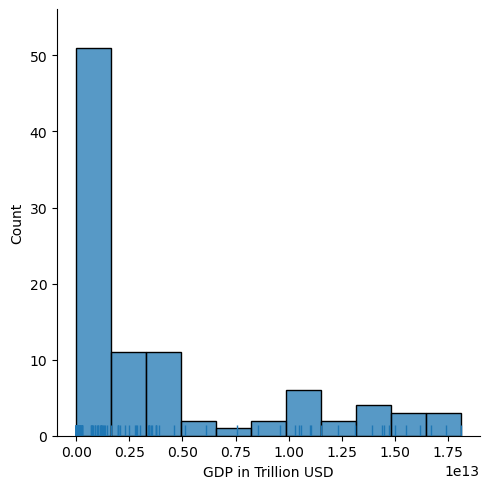

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

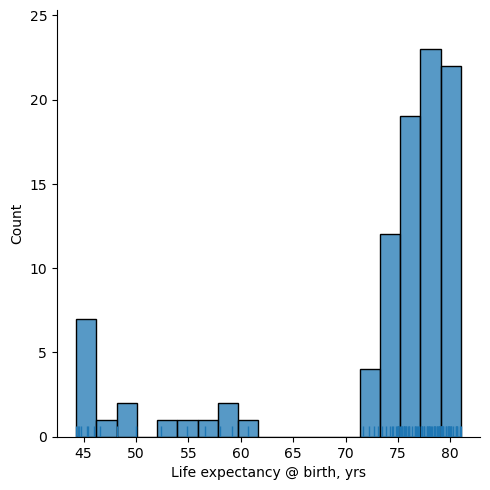

<Figure size 640x480 with 0 Axes>

In [64]:
plt.figure(figsize=(8,6))
sns.displot(data.GDP, rug = True, kde = False)
plt.xlabel('GDP in Trillion USD')
plt.show()
plt.clf()

plt.figure(figsize=(8,6))
sns.displot(data['Life Expectancy'], rug = True, kde = False)
plt.xlabel('Life expectancy @ birth, yrs')
plt.show()
plt.clf()

It's a start, but we can do better. we can sort the means of Life Expectancy and GDP per country.

In [66]:
data_means = data.drop("Year", axis = 1).groupby("Country").mean().reset_index()
data_means

,Country,Life Expectancy,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


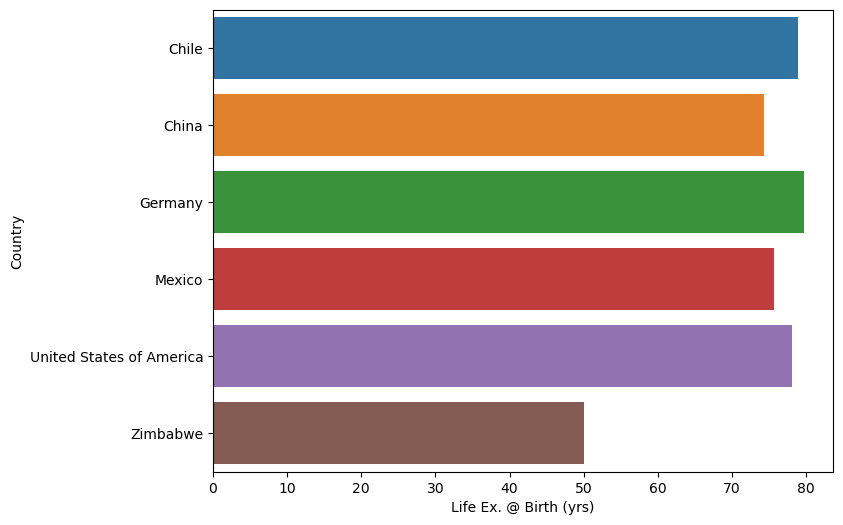

<Figure size 640x480 with 0 Axes>

In [68]:
plt.figure(figsize=(8,6))
sns.barplot(x='Life Expectancy', y='Country', data=data_means, hue = 'Country')
plt.xlabel('Life Ex. @ Birth (yrs)')
plt.show()
plt.clf()

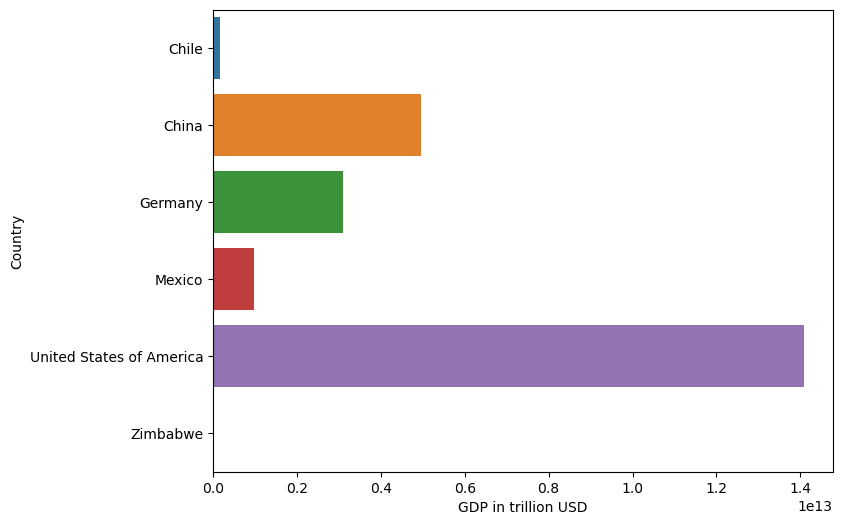

<Figure size 640x480 with 0 Axes>

In [69]:
plt.figure(figsize=(8,6))
sns.barplot(x='GDP', y='Country', data=data_means, hue = 'Country')
plt.xlabel('GDP in trillion USD')
plt.show()
plt.clf()